# Importing Tensorflow

In [112]:
import tensorflow as tf

# Callback

- Callback is a function.
- Applied during _training_ process.
- It deals with the stopping of training when certain accuray/loss score has reached.

In [113]:
class myCallback(tf.keras.callbacks.Callback):                                # callback class
    def here_epoch_ends(self , epoch , log={}):                                # function to set where eoch has to end.
        if(log.get('accuracy')>0.6):                                           # 60% accuracy , (condition for training termination)
            print('60% ACCURACY HAS REACHED , THEREFORE TRAINING STOPPED')     # printing when 60% reached.
            self.model.stop_training = True                                    # stopping the training finally 
            

# Fashion dataset

In [114]:
mnist = tf.keras.datasets.fashion_mnist

# Loading the data

In [115]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

# Instanciatin the callback 

In [116]:
callbacks = myCallback()

# Importing Matplotlib

- For **graphic** visualization

In [117]:
import matplotlib.pyplot as plt

- Now we will see some training images

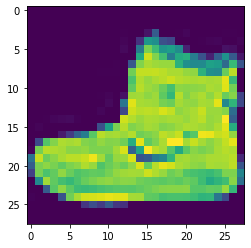

In [118]:
plt.imshow(x_train[0])            #randomly seeing

- Now we will print

In [119]:
print(x_train[0])            # observe closely , you see shoe in the numbers

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

- Now we will print the label (y_train)

In [120]:
print(y_train[0])

9


- Some more training image 

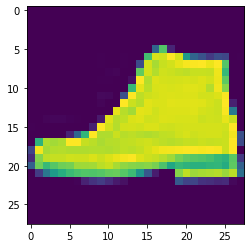

In [121]:
plt.imshow(x_train[42])     # randomly seeing

- Now we will print it

In [122]:
print(x_train[42])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187
   26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237
  255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234
  238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 23

- Now we will print label (y_train)

In [123]:
print(y_train[42])

9


# Normalizing the data

- Neural Networks work better with normalized data.

In [124]:
x_train = x_train/255.0
x_test = x_test/255.0

# Designing the model

In [125]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128 , activation = tf.nn.relu ),
                                   tf.keras.layers.Dense(10 , activation = tf.nn.softmax)])

- **Sequential** : Defines the sequence of layers in the _Neural Network_.


- **Flatten** : Converts eg. image into 1 Dimensional set.


- **Dense** : Adds a layer of neurons.


- Each layer of neurons require an **Activation Function** , which tells it what to do.


- **relu** : rectified linear unit | activation func | maathematically y = max(0,x) | ie; if x>0 return x else return 0.


- **softmax** : input values can be positive, negative, zero, or greater than one, but the softmax transforms them into values between 0 and 1, so that they can be interpreted as probabilities.


-eg. [0.1 , 0.2 .08 , 3.2 ,9.5 ,0.5 ,0.87 , 0.77]   >>>    [0 , 0 , 0 , 0 , 1 , 0 , 0 , 0]. (no need to break head to find max).


# Model compiling

In [126]:
model.compile(optimizer = tf.train.AdamOptimizer() , loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])

# Model building or training

In [127]:
model.fit(x_train , y_train , epochs = 10 , callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.4947 - acc: 0.8271
Epoch 2/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3766 - acc: 0.8631
Epoch 3/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3360 - acc: 0.8770
Epoch 4/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3131 - acc: 0.8850
Epoch 5/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2963 - acc: 0.8906
Epoch 6/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2813 - acc: 0.8962
Epoch 7/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2678 - acc: 0.8998
Epoch 8/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2569 - acc: 0.9047
Epoch 9/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2479 - acc: 0.9061
Epoch 10/10
60000/60000 [==============================] - 6s 98us/sample - loss: 

# Now testing (this is about the images Computer has not seen)

In [128]:
model.evaluate(x_test , y_test)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3411 - acc: 0.8833


[0.34110598868131636, 0.8833]